In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 7

# 入力長

In [22]:
TIME_STEPS = 16 #32
DIMENSION = 2
POINT_CNT = 21

# 学習データ読み込み

In [23]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [24]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [26]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION * POINT_CNT, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION * POINT_CNT, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION * POINT_CNT, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [15]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                16152     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 16,479
Trainable params: 16,479
Non-trainable params: 0
_________________________________________________________________


In [16]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [17]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.9367 - accuracy: 0.6262 - val_loss: 1.8852 - val_accuracy: 0.6897

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.8701 - accuracy: 0.6549 - val_loss: 1.8181 - val_accuracy: 0.6779

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.8041 - accuracy: 0.6616 - val_loss: 1.7412 - val_accuracy: 0.6728

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.7328 - accuracy: 0.6521 - val_loss: 1.6488 - val_accuracy: 0.6695

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.8083 - val_loss: 0.4075 - val_accuracy: 0.8735

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.8072 - val_loss: 0.4045 - val_accuracy: 0.8769

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8201 - val_loss: 0.4023 - val_accuracy: 0.8735

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8229 - val_loss: 0.3992 - val_accuracy: 0.8769

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5

14/14 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8567 - val_loss: 0.3420 - val_accuracy: 0.8668

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8477 - val_loss: 0.3422 - val_accuracy: 0.8668

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8561 - val_loss: 0.3419 - val_accuracy: 0.8668

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8499 - val_loss: 0.3415 - val_accuracy: 0.8634

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
14/14 [==============================] - 0s 2ms/step - loss:

14/14 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8617 - val_loss: 0.3363 - val_accuracy: 0.8836

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8578 - val_loss: 0.3360 - val_accuracy: 0.8702

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8533 - val_loss: 0.3359 - val_accuracy: 0.8735

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8595 - val_loss: 0.3350 - val_accuracy: 0.8702

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
14/14 [==============================] - 0s 2ms/step - loss:

Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8623 - val_loss: 0.3301 - val_accuracy: 0.8836

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8679 - val_loss: 0.3300 - val_accuracy: 0.8803

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8595 - val_loss: 0.3305 - val_accuracy: 0.8803

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8702 - val_loss: 0.3298 - val_accuracy: 0.8853

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
14/14 [==============================] - 0s 2

14/14 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8769 - val_loss: 0.3208 - val_accuracy: 0.8921

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8763 - val_loss: 0.3206 - val_accuracy: 0.8921

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8718 - val_loss: 0.3204 - val_accuracy: 0.8870

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8651 - val_loss: 0.3203 - val_accuracy: 0.8904

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
14/14 [==============================] - 0s 2ms/step - loss:

14/14 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8741 - val_loss: 0.3123 - val_accuracy: 0.8971

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8730 - val_loss: 0.3125 - val_accuracy: 0.8954

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8746 - val_loss: 0.3118 - val_accuracy: 0.8971

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8881 - val_loss: 0.3113 - val_accuracy: 0.8971

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
14/14 [==============================] - 0s 2ms/step - loss:

Epoch 281/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8769 - val_loss: 0.3033 - val_accuracy: 0.8954

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8808 - val_loss: 0.3032 - val_accuracy: 0.8938

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8775 - val_loss: 0.3026 - val_accuracy: 0.8988

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8876 - val_loss: 0.3015 - val_accuracy: 0.8988

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
14/14 [==============================] - 0s 2

14/14 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8853 - val_loss: 0.2984 - val_accuracy: 0.8954

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8831 - val_loss: 0.2984 - val_accuracy: 0.9005

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8842 - val_loss: 0.2982 - val_accuracy: 0.8954

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8814 - val_loss: 0.2980 - val_accuracy: 0.8971

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
14/14 [==============================] - 0s 2ms/step - loss:

14/14 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8820 - val_loss: 0.2900 - val_accuracy: 0.8954

Epoch 00351: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 352/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8966 - val_loss: 0.2901 - val_accuracy: 0.8954

Epoch 00352: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 353/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8909 - val_loss: 0.2898 - val_accuracy: 0.9005

Epoch 00353: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 354/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8842 - val_loss: 0.2907 - val_accuracy: 0.8954

Epoch 00354: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 355/1000
14/14 [==============================] - 0s 2ms/step - loss:

14/14 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8943 - val_loss: 0.2843 - val_accuracy: 0.9056

Epoch 00386: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 387/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8915 - val_loss: 0.2842 - val_accuracy: 0.9056

Epoch 00387: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 388/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8865 - val_loss: 0.2840 - val_accuracy: 0.9056

Epoch 00388: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 389/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8876 - val_loss: 0.2843 - val_accuracy: 0.9022

Epoch 00389: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 390/1000
14/14 [==============================] - 0s 2ms/step - loss:

Epoch 421/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8949 - val_loss: 0.2814 - val_accuracy: 0.9056

Epoch 00421: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 422/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8932 - val_loss: 0.2822 - val_accuracy: 0.9056

Epoch 00422: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 423/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8921 - val_loss: 0.2826 - val_accuracy: 0.9022

Epoch 00423: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 424/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8949 - val_loss: 0.2821 - val_accuracy: 0.9022

Epoch 00424: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 425/1000
14/14 [==============================] - 0s 2

Epoch 456/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8943 - val_loss: 0.2777 - val_accuracy: 0.9056

Epoch 00456: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8943 - val_loss: 0.2765 - val_accuracy: 0.9089

Epoch 00457: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.9016 - val_loss: 0.2763 - val_accuracy: 0.9056

Epoch 00458: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8909 - val_loss: 0.2768 - val_accuracy: 0.9089

Epoch 00459: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 460/1000
14/14 [==============================] - 0s 2

14/14 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8960 - val_loss: 0.2745 - val_accuracy: 0.9089

Epoch 00491: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 492/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8938 - val_loss: 0.2739 - val_accuracy: 0.9106

Epoch 00492: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 493/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8971 - val_loss: 0.2728 - val_accuracy: 0.9089

Epoch 00493: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 494/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8848 - val_loss: 0.2740 - val_accuracy: 0.9089

Epoch 00494: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 495/1000
14/14 [==============================] - 0s 2ms/step - loss:

In [36]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [37]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.9324328e-01 4.9807108e-04 4.0585021e-03 7.6771615e-04 6.8963546e-04
 4.9448118e-04 2.4832608e-04]
0


# 混同行列

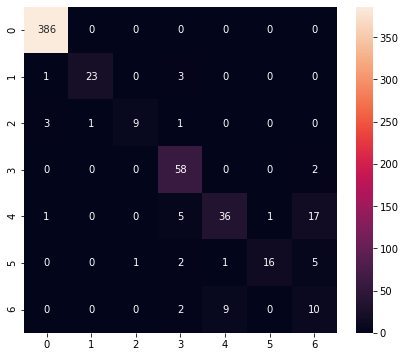

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       386
           1       0.96      0.85      0.90        27
           2       0.90      0.64      0.75        14
           3       0.82      0.97      0.89        60
           4       0.78      0.60      0.68        60
           5       0.94      0.64      0.76        25
           6       0.29      0.48      0.36        21

    accuracy                           0.91       593
   macro avg       0.81      0.74      0.76       593
weighted avg       0.92      0.91      0.91       593



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [39]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [40]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [41]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\AhLynne\AppData\Local\Temp\tmp2pwtioox\assets


INFO:tensorflow:Assets written to: C:\Users\AhLynne\AppData\Local\Temp\tmp2pwtioox\assets


6416

# 推論テスト

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_2', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.932433e-01 4.980711e-04 4.058502e-03 7.677165e-04 6.896358e-04
 4.944814e-04 2.483263e-04]
0
